# Training a Linear Classifier on Spiral Data

We will be training a linear classifier, using a hinge loss, on our toy dataset of points. After training our model, we will be able to visualize the decision boundary that it learned!

Model:
- $f(X; W, b) = XW + B$

Loss:
- Hinge loss, no regularization

In [1]:
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    pass

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from datasets import ToyData
from mygrad import Tensor
toy_data = ToyData()

Read the docstring for the `ToyData` class (place your cursor on `ToyData()` and hit shift-tab!). How many classes (tendrils) of data will be generated by the dataset?

### Loading the dataset
Look up the method for loading the data from the `toy_data` instance (`toy_data.<tab> brings up available attributes/methods`), and load in the training data/labels, and the testing data/labels. We actually will not be working with the testing data/labels for this notebook.

In [3]:
xtrain, ytrain, xtest, ytest = toy_data.load_data()


### Learning about the data

What is the dimensionality of the training data? How many pieces of data are contained in the training data? How many features are contained in a single datum? What is the largest and smalles number contained in the training data?

In [4]:
# STUDENT CODE HERE
print(xtrain.ndim)
print(xtrain.shape)
print(ytrain.ndim)
print(ytrain.shape)
print(xtrain[10])
print(ytrain[10])


2
(300, 2)
2
(300, 3)
[-0.18607855  0.07778089]
[ 0.  1.  0.]


Look at the shape and contents of the training labels. Given the number of pieces of training data that we have and the number of classes amongst them, how does the training labels indicate the class-label for each datum?

This label-formatting is known as **one-hot encoding**, which is a stupid name.

#### STUDENT WRITTEN ANSWER HERE

Use the method provided by `toy_data` to plot the data. What objects are returned by this method? They should be familiar to you in the context of the matplotlib function `plt.subplots()`.

<IPython.core.display.Javascript object>


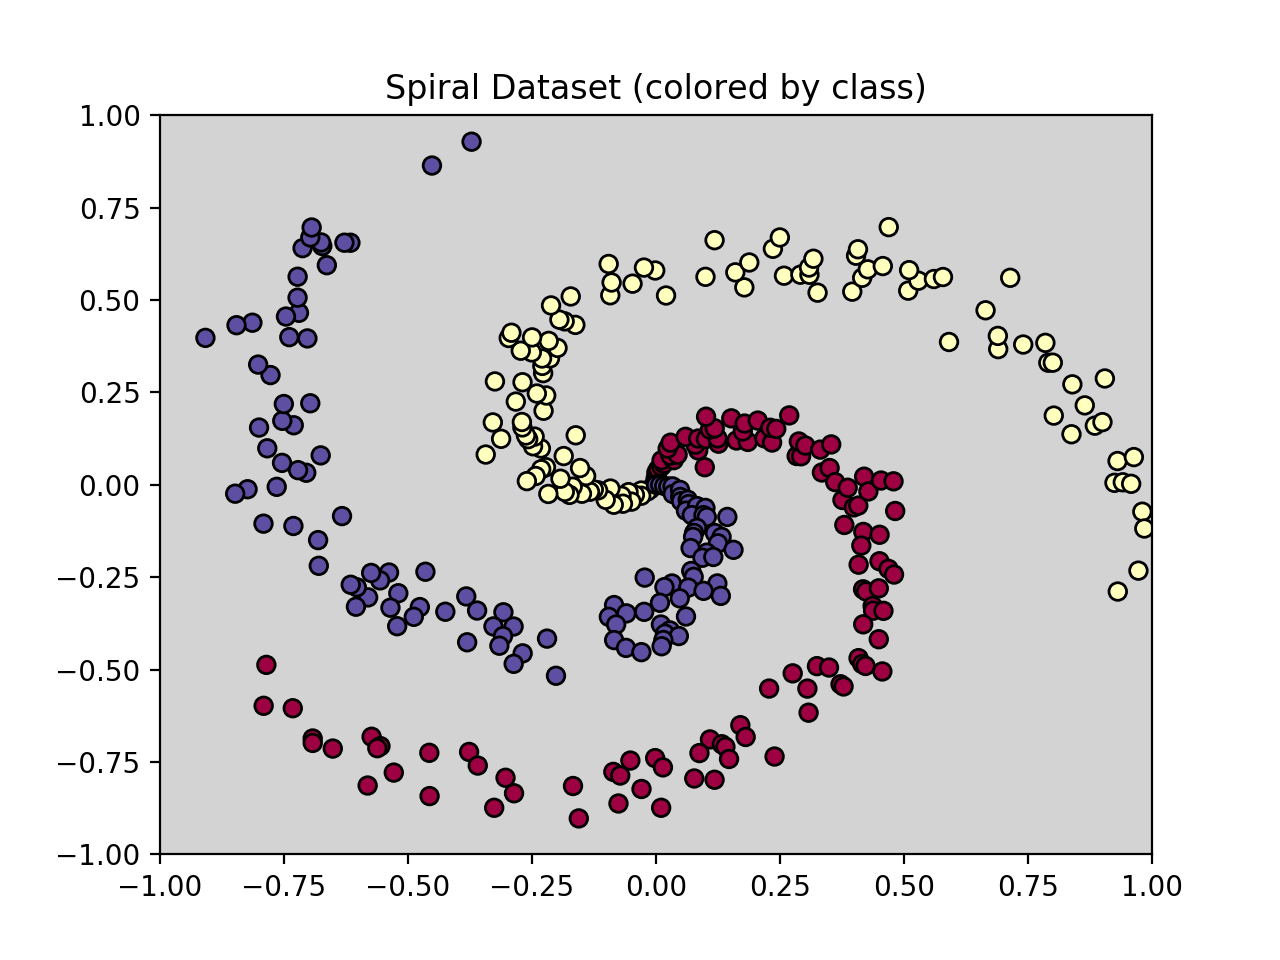

/Users/ji-macbook15/DataSets/datasets/__init__.py:148: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('lightgrey')


(<matplotlib.figure.Figure at 0x105b419b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x107702ef0>)

In [5]:
toy_data.plot_spiraldata()

Use this plot, and your access to the training data and labels to figure our which color belongs to which class-label (0, 1, or 2).

STUDENT WRTTEN ANSWER HERE
 - red: 0
 - yellow: 1
 - blue: 2



#### Initializing Your Model's Trainable Parameters
Recall the form of our model:
 - $f(X; W, b) = XW + b$
 
 Given the shape of our training data, what are the shapes of $W$ and $b$?
 
Read the documentation for `np.random.randn` (use shift-tab!). What kind of statistical distribution does this draw from? Is it a uniform distribution? Use this to initialize $W$.

Initialize $b$ as zeros?

Should these be numpy arrays or mygrad tensors?

In [6]:
# STUDENT CODE HERE
print(xtrain.shape)
W = Tensor(np.random.randn(2,3))
B = Tensor(np.zeros((3,)))

(300, 2)


#### Preparing your optimization scheme
We will be using "vanilla" gradient descent (referred to as stochastic gradient descent (SGD) in literature) to train our model. Write a simple function that takes in a trainable parameter and any other parameters needed for performing gradient descent. This function should return the updated **data** of the parameter. All operations involving a `Tensor` should only be using its `grad` and `data` properties. We do not want to create a computational graph when we already have the gradients we want! 

This is a rare instance where we want the function to **mutate** the input data: it should work with a *view* of the data and update it. Thus it need not return anything!

Include a reasonably-detailed docstring for this function. Indicate what variable-types it expects and returns.

In [7]:
# STUDENT CODE HERE
def descent(train, B, stepsize):
    """Goes down gradient
    Parameters 
    ----------
    train: mygrad.Tensor
    stepsize: int
    
    Returns
    ---------
    None
    """
#     train.backward()
    train.data -= stepsize*train.grad
    B.data -= stepsize*B.grad

Write a function that takes in your model's output and any other parameters it needs to compute the mean accuracy of your prediction. Write a descent docstring.

In [8]:
# STUDENT CODE HERE
def mean(y_hat, y_actual):
    y = []
    for i in range(y_hat.shape[0]):
        if np.argmax(y_hat.data[i]) == np.argmax(y_actual[i]):
            y.append(1)
        else:
            y.append(0)
    return np.mean(y)
    #y = [1 if y_hat[i] == y_actual[i] else 0 for i in range(y_hat.size)]
    # np.mean(y_hat[y_hat == y_actual])
    #return np.mean(y)
#mean(a,b)

Import `dense` from mygrad's layers and `multiclass_hinge` from the losses.

In [9]:
from mygrad.nnet.layers import dense
from mygrad.nnet.losses import multiclass_hinge

Read the documentation for multiclass hinge. What format of `y_train` does it expect? What is the form of our labels? How can you get labels in the form expected by multiclass hinge?

In [10]:
# STUDENT CODE HERE
# label_locs = np.argwhere([i for i in ytrain])[:,1]
label_locs = np.where(ytrain==1)[-1]
#label_locs

Using a learning rate of `1.` and **no** regularization, train your model for 1000 iterations. Record the loss and accuracy for each operation. Plot them afterwards.

In [11]:
#label_locs

In [12]:
#xtrain

In [13]:
#dense(xtrain.data, W) + B

In [14]:
#label_locs

In [15]:
#c = Tensor([1,2,3])

In [16]:
#_,_,_ = c
scores = dense(xtrain.data, W) + B
mean(scores, ytrain)

0.34999999999999998

In [17]:
loss = []
accuracy = []
stepsize = 1
for i in range(1000):
    scores = dense(xtrain.data, W) + B #compute scores
    computedloss = multiclass_hinge(scores, label_locs) #
    computedloss.backward()

    loss.append(computedloss.data)   
    accuracy.append(mean(scores, ytrain))
    
    descent(W, B, stepsize) 
    computedloss.null_gradients()
print(W)

Tensor(
[[ 1.34456814  0.9603541  -1.35465324]
 [-2.18571115  2.09200195 -1.01668182]]
)


Look at the values in W. Specifically note the columns. Keeping in mind what columns correspond to which color, visualize where the columns of W would be plotted if they were points. Why does this make sense? Plot the points for further clarification and practice. 

<IPython.core.display.Javascript object>


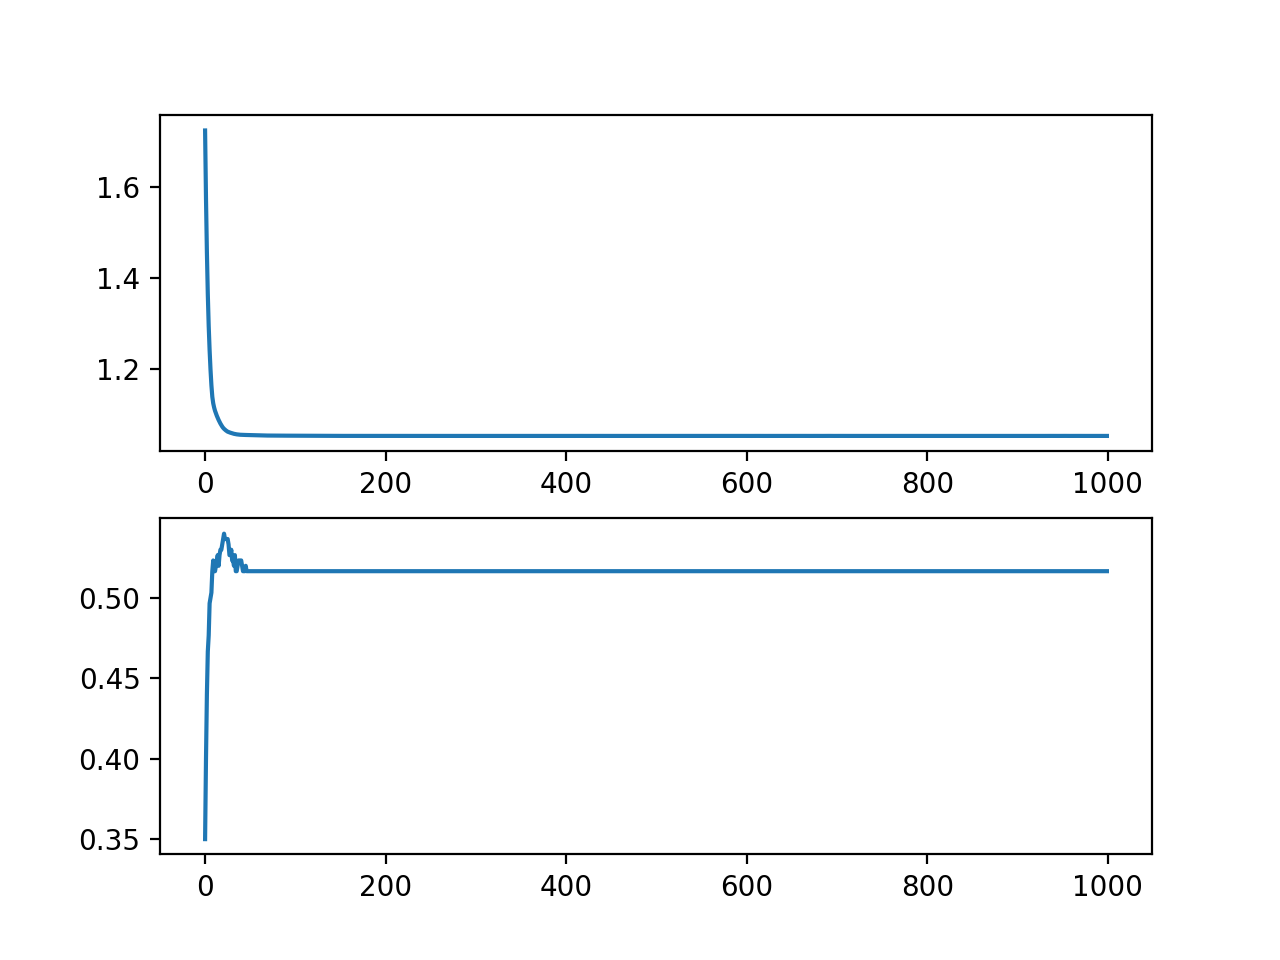

In [20]:
fig,(ax,ax2) = plt.subplots(nrows=2)
ax.plot(loss)
ax2.plot(accuracy)

In [23]:
def fwd_pass(x):
    return (dense(x, W.data) + B.data).data

<IPython.core.display.Javascript object>


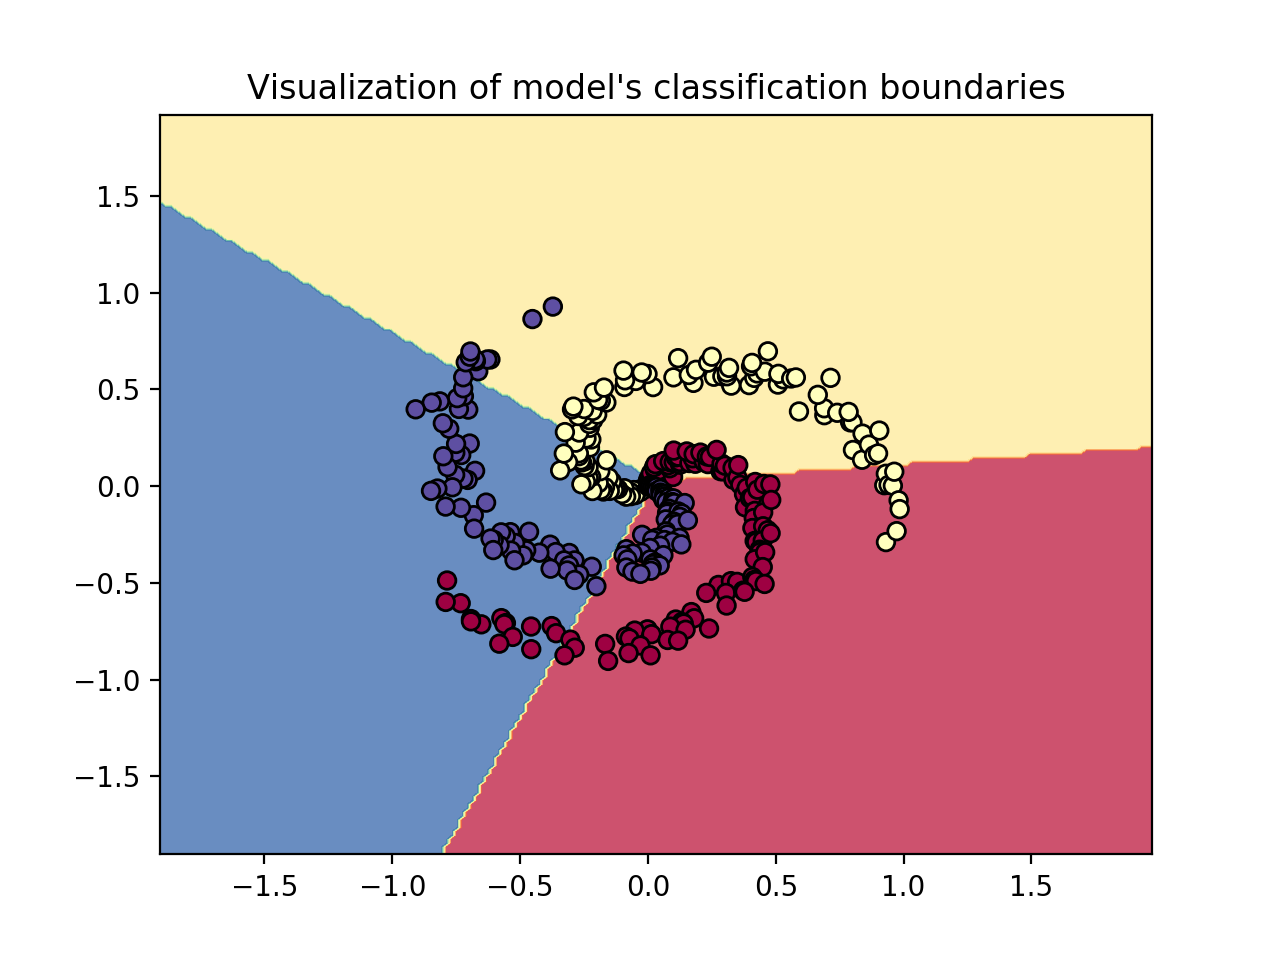

(<matplotlib.figure.Figure at 0x10aedb240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10aee81d0>)

In [24]:
toy_data.visualize_model(fwd_pass)